# IIVP - Project 1
### 6252320 - Leon Debnath

Import the required modules for the notebook

In [1]:
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
def display(images, labels, axis='off', cmap=None, figsize=(15,10)):
    
    if len(images) != len(labels):
        raise Exception("images and labels don't correspond")
        
    fig = plt.figure(figsize=figsize)
    cols = 2
    rows = math.ceil(len(images)/2)
    
    for i in range(len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(labels[i])
        plt.axis(axis)

## Exercise 1

## Exercise 2

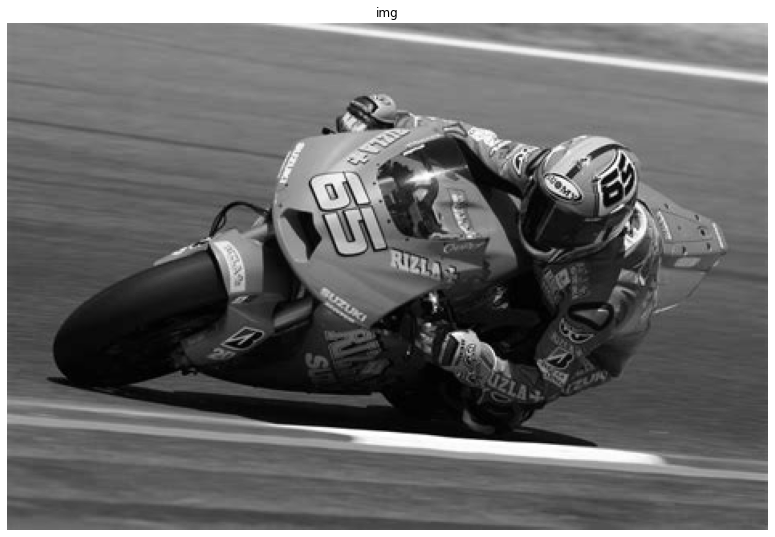

In [3]:
from scipy import fftpack
from numpy import pi
from numpy import r_

img = cv2.cvtColor(cv2.imread('images/motogp.jpeg'), cv2.COLOR_BGR2GRAY)

display([img],['img'], cmap='gray', figsize=(30,10))

## 2.1 Watermark Insertion

In [4]:
def dct2(a):
    return fftpack.dct( fftpack.dct( a.T, norm='ortho' ).T, norm='ortho' )


def dct(img, block_size=8):
    
    dct = np.zeros(img.shape)

    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            dct[i: i + block_size, j: j + block_size] = dct2(img[i:i+ block_size, j: j+ block_size])
            
    return dct

In [5]:
def idct2(a):
    return fftpack.idct( fftpack.idct( a.T , norm='ortho').T,norm='ortho')        
        
def idct(img_dct, block_size=8):
    
    img = np.zeros(img_dct.shape)
    
    for i in r_[:img.shape[0]: block_size]:
        for j in r_[:img.shape[1]: block_size]:
            img[i:(i + block_size), j:(j + block_size)] = idct2( img_dct[i:(i + block_size),j:(j + block_size)])
    
    return img

In [6]:
def apply_threshold(img_dct, threshold):
    
    return img_dct * (abs(img_dct) > (threshold * np.max(img_dct)))
    

In [7]:
def filter_k(block, k):
    """ Return the K (absolute) largest values in the same location as found in the block """
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c]
        block_abs[r,c] = 0;
        
    return oput
        
def filter_k_highest(img_dct, k, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = filter_k(img_dct[i:(i + block_size),j:(j + block_size)], k)
    
    return oput

### 2.1.1 - Compute the 2-D DCT

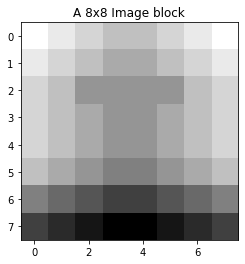

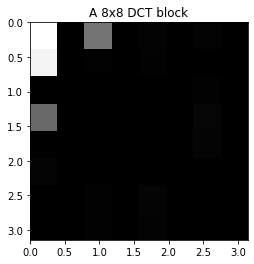

In [8]:
pos = 0
block_size=8

img_dct = dct(img)

# Extract a block from image
plt.figure()
plt.imshow(img[pos: pos + block_size, pos: pos + block_size], cmap='gray')
plt.title(f"A {block_size}x{block_size} Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos: pos + block_size, pos: pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"A {block_size}x{block_size} DCT block");

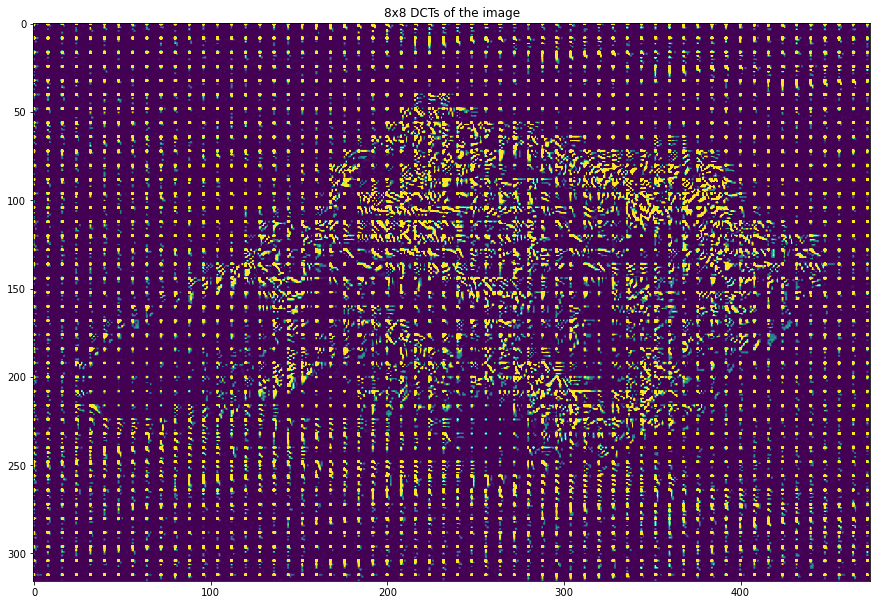

In [9]:
# Display entire DCT
plt.figure(figsize=(15,15))
plt.imshow(img_dct, vmax = np.max(img_dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image");

### 2.1.2 - Choose the $K$ Largest Coeficients 

In [10]:
x = [x * 0.0005 for x in range(1, 50)]
thresholds = {}
coeficients = {}

for key in x:
    thresholds[key] = apply_threshold(img_dct, key)
    coeficients[key] = 100 * np.sum(thresholds[key] != 0.0 ) / (img.shape[0] * img.shape[1] * 1.0)
    
# keys = list(thresholds.keys())
# imgs = list(thresholds.values())
# display(imgs, keys, cmap='gray', figsize=(15,25))

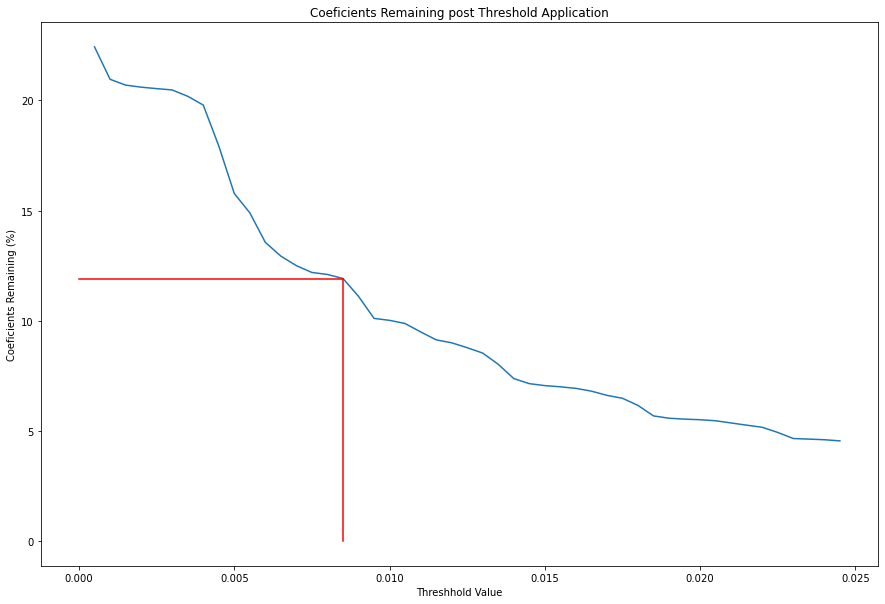

In [11]:
plt.figure(figsize=(15,10))
plt.plot(list(coeficients.keys()), list(coeficients.values()))
plt.plot([0.0085, 0.0085],[0, 11.9], 'r')
plt.plot([0, 0.0085],[11.9, 11.9], 'r')
plt.title('Coeficients Remaining post Threshold Application')
plt.xlabel('Threshhold Value')
plt.ylabel('Coeficients Remaining (%)');

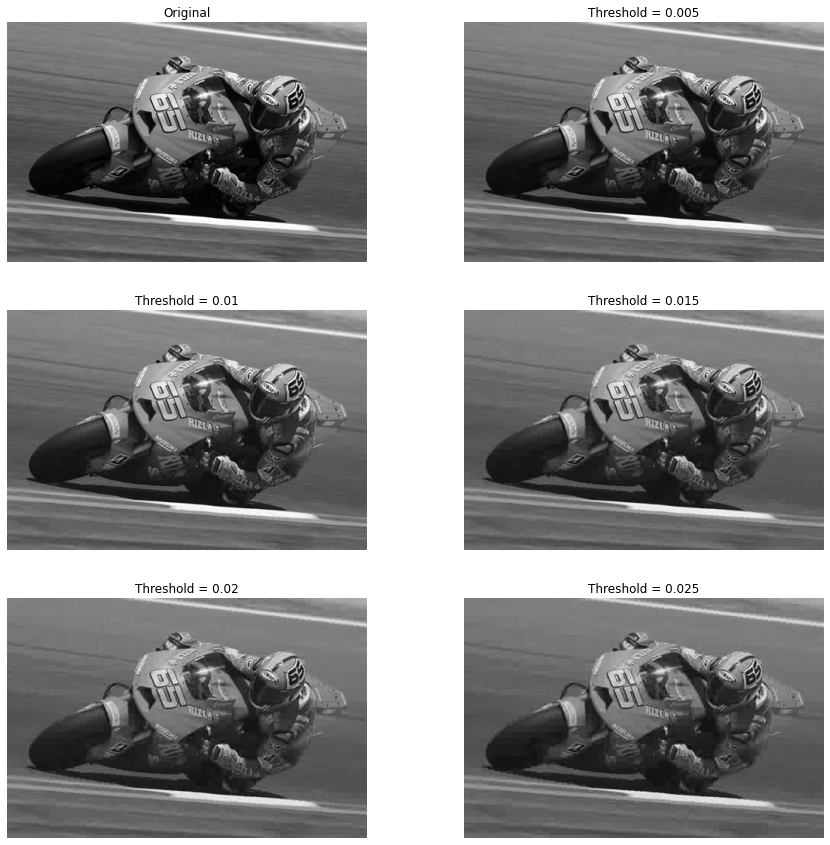

In [12]:
transformed = idct(apply_threshold(img_dct, 0.001))

display([img, 
         idct(apply_threshold(img_dct, 0.005)),
         idct(apply_threshold(img_dct, 0.01)),
         idct(apply_threshold(img_dct, 0.015)),
         idct(apply_threshold(img_dct, 0.02)),
         idct(apply_threshold(img_dct, 0.025))],
        ['Original',
         'Threshold = 0.005',
         'Threshold = 0.01',
         'Threshold = 0.015',
         'Threshold = 0.02',
         'Threshold = 0.025'],
        figsize=(15,15),
        cmap='gray')

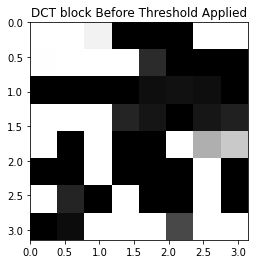

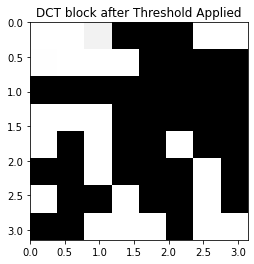

In [13]:
x_pos = 100
y_pos = 200
block_size=8

img_dct = dct(img)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])
plt.title(f"DCT block Before Threshold Applied");

img_dct_t = apply_threshold(img_dct, 0.0085)

# Display the dct of that block
plt.figure()
plt.imshow(img_dct_t[x_pos: x_pos + block_size, y_pos: y_pos + block_size],
           cmap='gray',
           vmax=np.max(img_dct) * 0.01,
           vmin=0,
           extent=[0,pi,pi,0])

plt.title(f"DCT block after Threshold Applied");

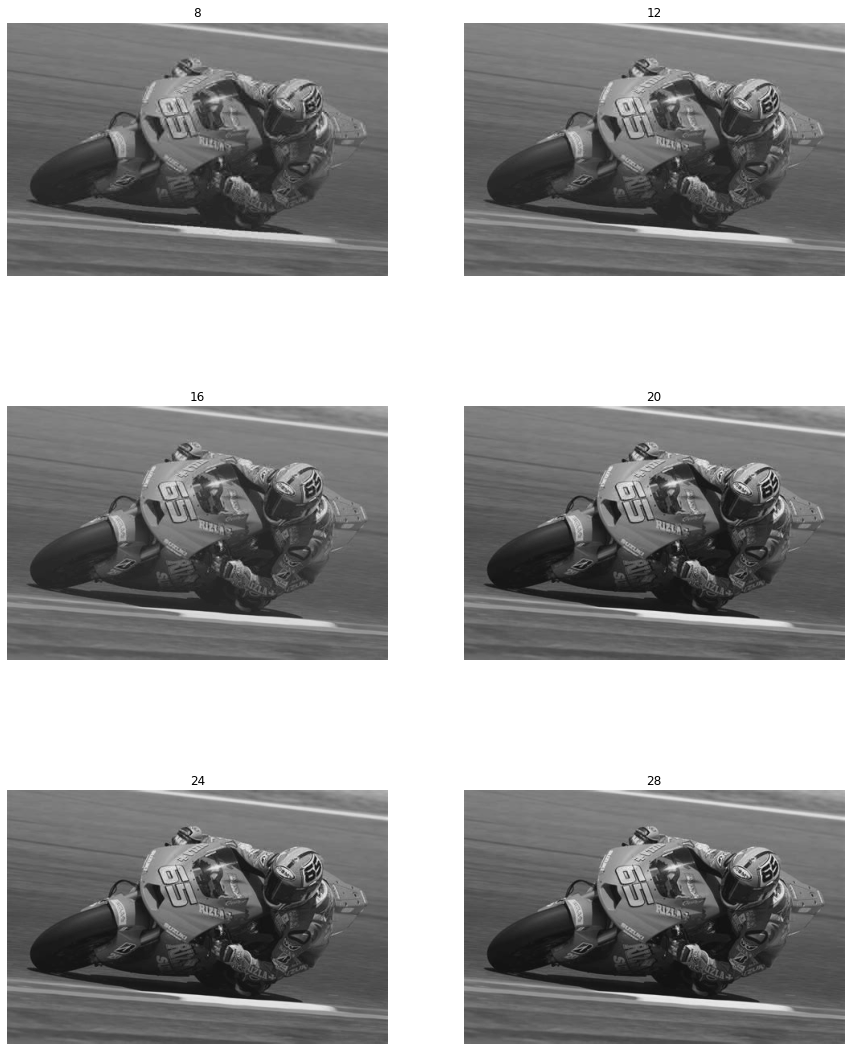

In [14]:
K = [n for n in range(8,32,4)]

images = {}

for k in K:
    images[k] = idct(filter_k_highest(img_dct, k))
    
values = list(images.values())
keys = list(images.keys())
display(values, keys, cmap='gray', figsize=(15, 20))


### 2.1.3 - Create a watermark

In [15]:
k = 32
mu = 0
sigma = 1
alpha = 0.1

w = np.random.default_rng().normal(size=(k,))
print(w)

[ 0.69912097 -0.95031239 -0.74426021  0.02762155 -0.59122455  0.27360617
 -1.73017417  0.90181297  0.03719596 -1.88476203 -0.37800688 -0.03268631
 -0.6919687   0.04712176 -0.49264072 -0.20897818  0.78420015 -0.99361729
 -1.25907594  1.66916302 -0.08095456 -0.06289386  0.66967464 -0.95983101
  0.42027094  0.23311949 -0.58787199  1.32266975 -0.1927995   1.27613522
 -0.27335673  0.40230363]


### 2.1.4 - Embed a Watermark

In [16]:
def watermark_block(block, w):
    oput = np.zeros(block.shape)
    block_abs = np.abs(block)
    
    for w_i in w:
        r, c = np.unravel_index(np.argmax(block_abs, axis=None), block_abs.shape)
        oput[r,c] = block[r,c] * (1 + alpha * w_i)
        block_abs[r,c] = 0;
    
    oput[0,0] = block[0,0]     
    return oput
        
def watermark(img_dct, w, block_size=8):
    oput = np.zeros(img_dct.shape)
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            oput[i:(i + block_size), j:(j + block_size)] = watermark_block(img_dct[i:(i + block_size),j:(j + block_size)], w)
    
    return oput

### 2.1.5 - Create the Watermarked DCT

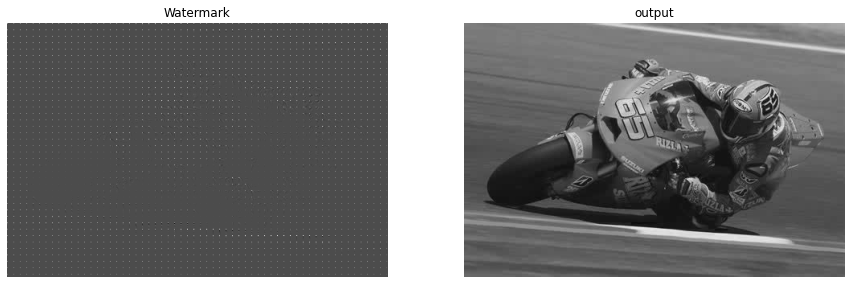

In [17]:
img_w = watermark(img_dct_t, w)

display([img_w, idct(img_w)],['Watermark', 'output'], cmap='gray')

### 2.1.6 - Comparison

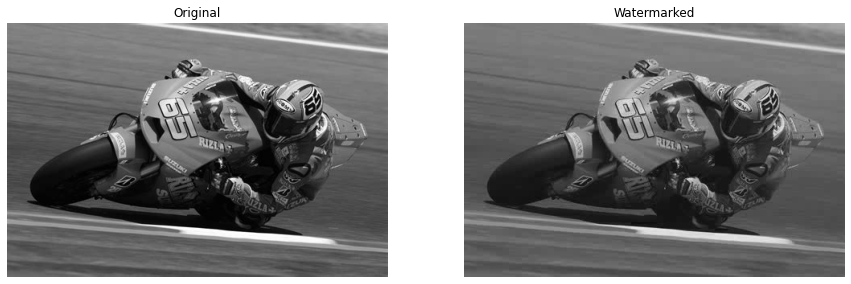

In [18]:
display([img, idct(img_w)], ['Original', 'Watermarked'], cmap='gray')

### 2.1.7 - Histogram

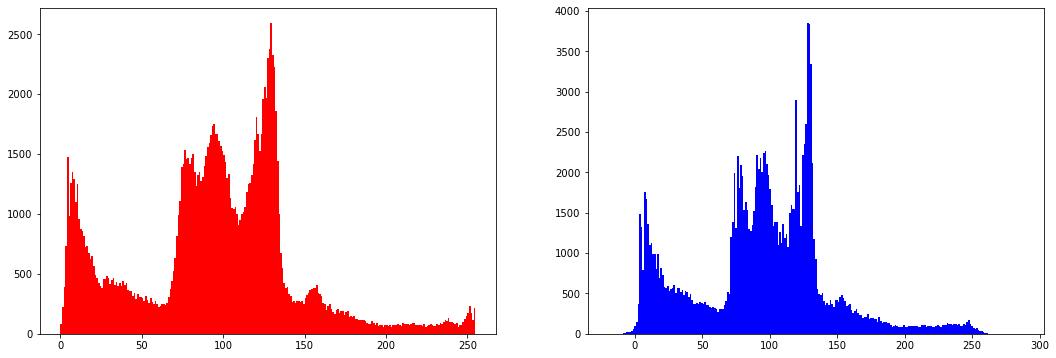

In [19]:
img_flattened = np.reshape(img, (img.shape[0] * img.shape[1],))
w_flattened = np.reshape(idct(img_w), (img_w.shape[0] * img_w.shape[1],))

fig = plt.figure(figsize=(18,6))
fig.add_subplot(1, 2, 1)
plt.hist(img_flattened, bins=255, color='red');
fig.add_subplot(1, 2, 2)
plt.hist(w_flattened, bins=255, color='blue');

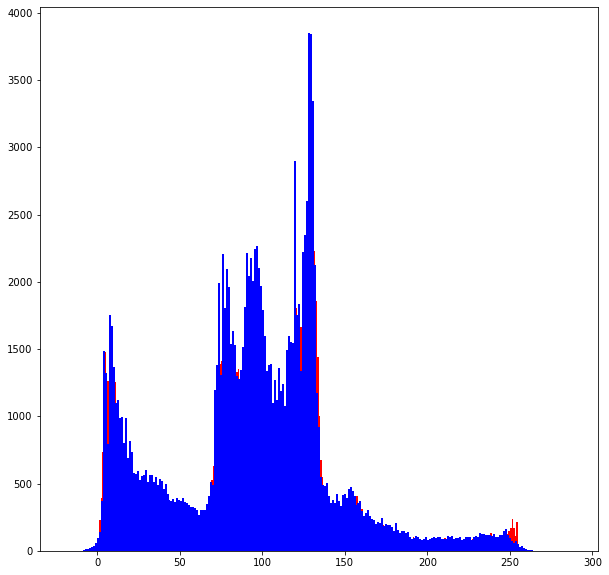

In [20]:
plt.figure(figsize=(10,10))
plt.hist(img_flattened, bins=255, color='red');
plt.hist(w_flattened, bins=255, color='blue');

### 2.1.8 - DC Coefficient
TODO - Explain

## 2.2 - Watermark Detection

### 2.2.1 - Compute the 2D DCT

In [21]:
mystery_1 = img
mystery_2 = idct(img_w)
m1_dct = dct(mystery_1)
m2_dct = dct(mystery_2)

## 2.2.2 - Keep the K largest non-DC coefficients

In [22]:
def remove_DC(img_dct):
    oput = img_dct
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            oput[i, j] = 0
    
    return oput

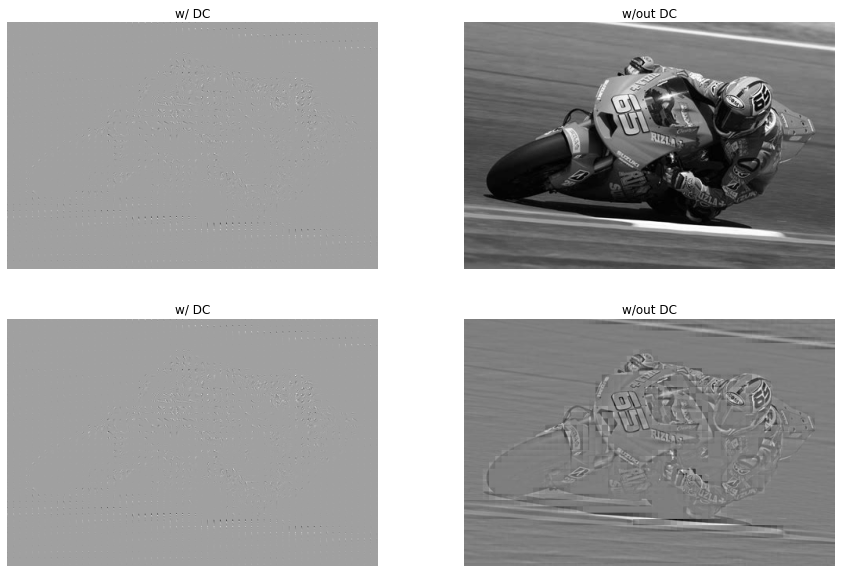

In [23]:
dc_less = remove_DC(m1_dct)
display([m1_dct, mystery_1, dc_less, idct(dc_less)],['w/ DC', 'w/out DC', 'w/ DC', 'w/out DC'], cmap='gray')

In [24]:
m1_dct_filtered = filter_k_highest(m1_dct, k)
m2_dct_filtered = filter_k_highest(m2_dct, k)

In [25]:
def compare_block(c_hat, c, k):
    w_hat = []
    c_hat = np.abs(c_hat)
    c_act = np.abs(c)
    
    c_hat[0, 0] = 0
    
    for i in range(k):
        r, c = np.unravel_index(np.argmax(c_hat, axis=None), c_hat.shape)
        
        denom = (alpha * c_act[r, c])
        numer = (c_hat[r, c] - c_act[r, c])
        
        if denom != 0:
            w_hat.append(numer/denom)
        else:
            w_hat.append(0)
                 
        c_hat[r, c] = 0
              
    return w_hat

In [26]:
def estimate_watermark(img_a, img_b, k, block_size=8):
    w_hat = []
    
    for i in r_[:img_dct.shape[0]: block_size]:
        for j in r_[:img_dct.shape[1]: block_size]:
            
            c_hat = img_a[i:(i + block_size),j:(j + block_size)]
            c = img_b[i:(i + block_size),j:(j + block_size)]
            
            w_i = compare_block(c_hat, c, k)
            w_hat.append(w_i)
    
    return np.asarray(w_hat)

In [27]:
w_hats = estimate_watermark(m1_dct_filtered, m2_dct_filtered, k)
print(w_hats.shape)

np.max(w_hats)

(2400, 32)


2.894522984691616e+18

In [28]:
w

array([ 0.69912097, -0.95031239, -0.74426021,  0.02762155, -0.59122455,
        0.27360617, -1.73017417,  0.90181297,  0.03719596, -1.88476203,
       -0.37800688, -0.03268631, -0.6919687 ,  0.04712176, -0.49264072,
       -0.20897818,  0.78420015, -0.99361729, -1.25907594,  1.66916302,
       -0.08095456, -0.06289386,  0.66967464, -0.95983101,  0.42027094,
        0.23311949, -0.58787199,  1.32266975, -0.1927995 ,  1.27613522,
       -0.27335673,  0.40230363])

## 4.1 - Principal Component Analysis

In [29]:
# PCA Steps:

# 1. Format the data into a matrix of points where each is a vector [x, y, z] (M_data)

# 2. Calculate the Mean vector  (x_mean)

# 3. Subtract Mean from data matrix  (M = M_data - x_mean)

# 4. Calculate the Covariance matrix  (C = M * M ^T)

# 5. Calculate the Eigen vectors and Eigen values of the covariance matrix

Images have dimensions:  height = 900px , width = 600px, channels = 3


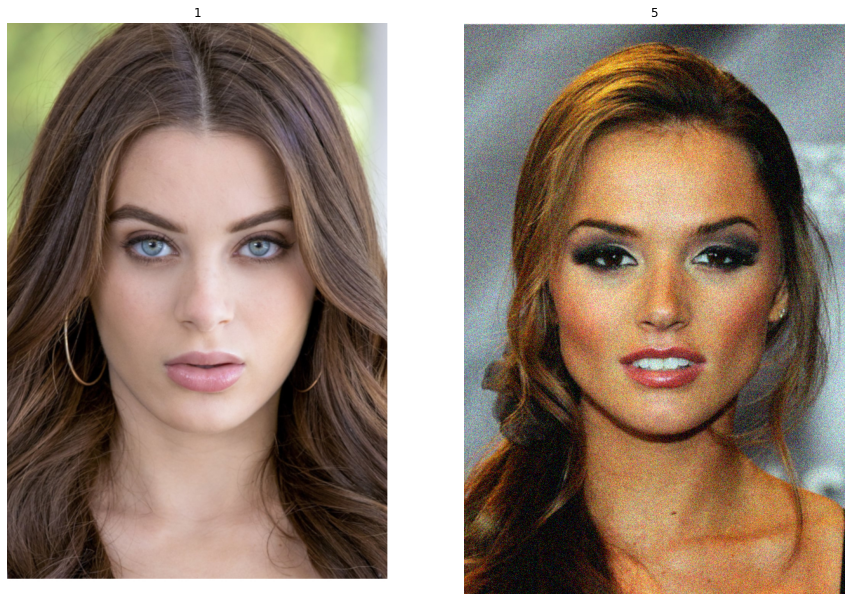

In [35]:
import glob

faces = []

for filename in glob.glob('faces/*.jpeg'):
    faces.append(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))

height, width, channels = faces[0].shape

print(f"Images have dimensions:  height = {height}px , width = {width}px, channels = {channels}")
display([faces[0], faces[1]], [1, 5], figsize=(15,25))

In [36]:
# 1. Format the data into a matrix of points where each image is a vector of m * n (900 * 600)   
lst = []

for face in faces:
    m, n, c = face.shape
    lst.append(np.reshape(face, m * n * c))
    
M_data = np.stack(lst, axis=0)
M_data = M_data / 255
print(M_data.shape)
print(np.max(M_data))
print(np.min(M_data))

(23, 1620000)
1.0
0.0


In [37]:
# 2. Calculate the Mean vectors
mean = np.mean(M_data, axis=0)
print(mean)
print(mean.shape)
print(np.max(mean))
print(np.min(mean))

[0.78022165 0.83870418 0.66615516 ... 0.66155158 0.61653879 0.58209719]
(1620000,)
0.9756180733162829
0.022847399829497014


In [38]:
# 3. Subtract Mean from data matrix  (M = M_data - x_mean)
M_data = np.subtract(M_data, mean)
M_data.shape

(23, 1620000)

In [39]:
# 4. Calculate the Covariance matrix  (C = M * M ^T)
C = np.dot(M_data, M_data.T)
C

array([[ 54128.47391419,  -9969.76483946,  -4595.69528628,
        -20317.0269761 , -21014.14402941,   3205.54316582,
         -7932.40203319,  67329.8837813 ,  -7086.172365  ,
        -19209.58897199, -15687.34959717, -22570.04390337,
          -408.08702926, -28003.05745267, -10166.26090419,
         -1792.79502919, -27715.53009497,  48881.95125836,
        -12420.44626968,  52195.91133859,  -6669.21467448,
        -10424.31421613,    240.13021428],
       [ -9969.76483946,  56128.80471138,  -6312.67893806,
        -13345.50780588,  47872.23221117,  -7761.7807397 ,
          4998.28511858, -15593.74142372, -10606.2579468 ,
        -19556.18026698,  -9998.47677835,  -8700.0652022 ,
          3281.98866537, -15487.03358426,    851.98024988,
          2845.12630942, -20979.23614582,   1315.71358121,
         -8798.01517328, -11650.71598869,  46178.05351535,
         -6597.96821007,   1885.23868092],
       [ -4595.69528628,  -6312.67893806,  48609.92843904,
        -12131.32057488, -128

In [40]:
# 5. Calculate the Eigen vectors and Eigen values of the covariance matrix
np.linalg.eig(C)

(array([6.53107874e+05, 2.88532404e+05, 2.46340961e+05, 1.89704157e+05,
        1.57421235e+05, 1.05061030e+05, 5.51310375e+04, 3.28957696e+04,
        1.24824655e+04, 8.16134330e+03, 6.43866407e+03, 5.68558973e+03,
        4.65846618e+03, 4.23740521e+03, 3.53824920e+03, 3.28861942e+03,
        3.18008719e+03, 1.80190475e+03, 3.63977191e-11, 2.97776734e+02,
        2.47038681e+02, 1.78103412e+02, 2.04038081e+02]),
 array([[ 9.65461232e-02,  3.84945017e-01, -4.94962505e-02,
          1.94988492e-02, -8.04653720e-02,  8.59701242e-02,
         -4.42416075e-02, -1.77256960e-01, -1.82098358e-01,
          6.45912809e-02, -1.37690746e-01,  1.23598558e-01,
         -9.12627854e-02,  1.59746585e-01, -5.71499339e-02,
         -2.62891306e-01,  3.82429357e-01, -2.02238170e-01,
         -2.08514414e-01, -1.66635757e-01, -5.09400456e-01,
          2.13753409e-01,  2.25948280e-01],
        [ 4.29462861e-02, -1.29933312e-01,  3.52175167e-02,
          2.72620601e-01, -4.07549456e-01, -2.59445478e-01

In [41]:
m, eigen_vectors = cv2.PCACompute(M_data, mean=None, maxComponents=10)

print(f"Mean vector shape: {mean.shape}")
print(f"Mean vector max: {np.max(mean)}")
print(f"Mean vector min: {np.min(mean)}\n")

print(f"Eigen Vectors shape: {eigen_vectors.shape}")
print(f"Eigen Vectors max: {np.max(eigen_vectors)}")
print(f"Eigen Vectors min: {np.min(eigen_vectors)}\n")
print(eigen_vectors)

Mean vector shape: (1620000,)
Mean vector max: 0.9756180733162829
Mean vector min: 0.022847399829497014

Eigen Vectors shape: (10, 1620000)
Eigen Vectors max: 0.004098543449867119
Eigen Vectors min: -0.005736012818847206

[[ 6.72016555e-04  7.39616130e-04  1.37228510e-03 ...  8.80025202e-04
   7.97965378e-04  6.73372921e-04]
 [-2.85626553e-04  6.47059556e-05 -9.91703328e-04 ...  1.49301462e-03
   1.59789879e-03  1.65360779e-03]
 [-2.05541768e-03 -1.03110885e-03 -1.57712212e-03 ...  2.35225350e-03
   2.89860704e-03  3.29902094e-03]
 ...
 [ 1.02260627e-03 -5.36202285e-04  9.86927031e-04 ... -1.00243336e-03
  -1.10405741e-03 -1.06257502e-03]
 [-1.14185738e-04 -1.16185341e-03 -1.70537825e-03 ...  1.54145991e-04
   7.16323624e-04  1.59589936e-03]
 [-1.15112488e-03 -1.01760363e-04 -1.12798737e-03 ...  2.68339527e-04
   6.91197883e-05 -3.01016710e-04]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


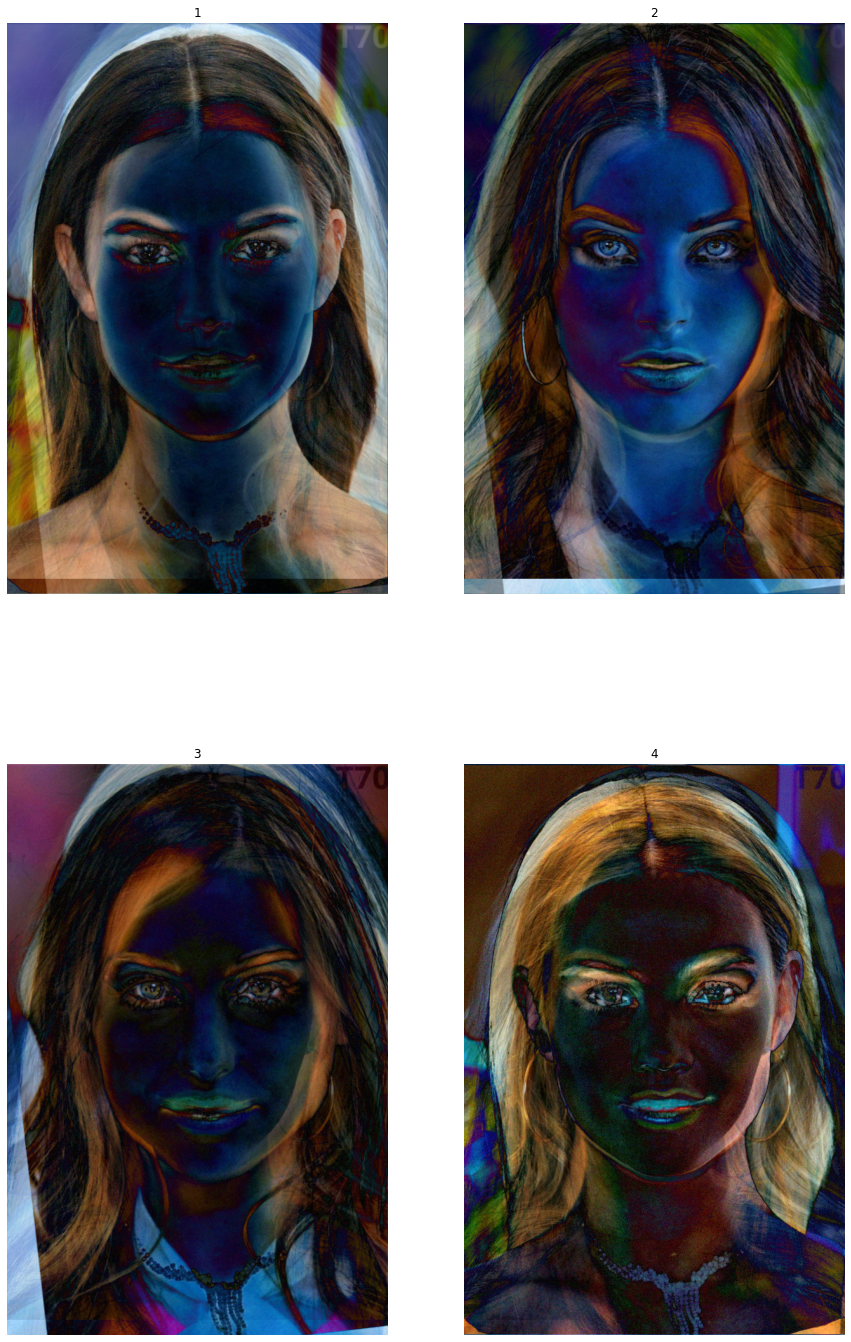

In [42]:
# Reshape EigenVectors to obtain EigenFaces
eig_faces = [np.reshape(e, (height, width, channels)) for e in eigen_vectors]

display([np.abs(eig_faces[0]) / np.max(eig_faces[0]), 
         np.abs(eig_faces[1]) / np.max(eig_faces[1]),
         np.abs(eig_faces[2]) / np.max(eig_faces[2]),
         np.abs(eig_faces[3]) / np.max(eig_faces[3])], [1,2,3,4], figsize=(15,25))

In [43]:
mean_face = np.reshape(mean, (height, width, channels))

output = np.zeros(mean_face.shape)

alpha = np.dot(M_data[0], eigen_vectors[0])

print(alpha)

ouput = np.add(mean_face, np.multiply(eig_faces[0], alpha))
np.min(ouput)

-78.02383620787829


0.015130025436932542

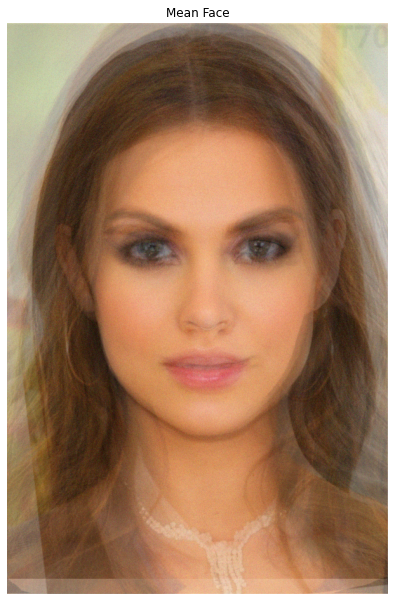

In [49]:
display([mean_face],['Mean Face'], figsize=(15,25))

In [45]:
print(np.max(mean_face))

0.9756180733162829


In [46]:
print(np.min(mean_face))

0.022847399829497014
